In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import mplfinance as mpl

In [2]:
def wrangle(path):
    df = pd.read_csv(path)
    df["Date"] = pd.to_datetime(df["Date"])
    df = df.drop(columns = ["Adj Close", "Volume"]).set_index(df["Date"]).drop(columns = "Date")
    df[["Open_X", "Close_X","High_X", "Low_X"]]= df[["Open", "Close", "High", "Low"]].shift(1)
    df.dropna(inplace = True)
    return df

In [17]:
curr = wrangle("EURUSD=X.csv")
curr.tail(10)

,Open,High,Low,Close,Open_X,Close_X,High_X,Low_X
Date,,,,,,,,
2023-01-09,1.065632,1.075951,1.065280,1.065632,1.052222,1.052222,1.062225,1.048526
2023-01-10,1.073318,1.075685,1.071318,1.073318,1.065632,1.065632,1.075951,1.065280
2023-01-11,1.073895,1.077470,1.072685,1.073895,1.073318,1.073318,1.075685,1.071318
2023-01-12,1.076600,1.083835,1.073802,1.076600,1.073895,1.073895,1.077470,1.072685
2023-01-13,1.086024,1.086779,1.078063,1.086024,1.076600,1.076600,1.083835,1.073802
2023-01-16,1.082462,1.087548,1.080264,1.082462,1.086024,1.086024,1.086779,1.078063
2023-01-17,1.083013,1.086909,1.078702,1.083013,1.082462,1.082462,1.087548,1.080264
2023-01-18,1.079331,1.088447,1.076704,1.079331,1.083013,1.083013,1.086909,1.078702
2023-01-19,1.079785,1.083306,1.078295,1.079785,1.079331,1.079331,1.088447,1.076704


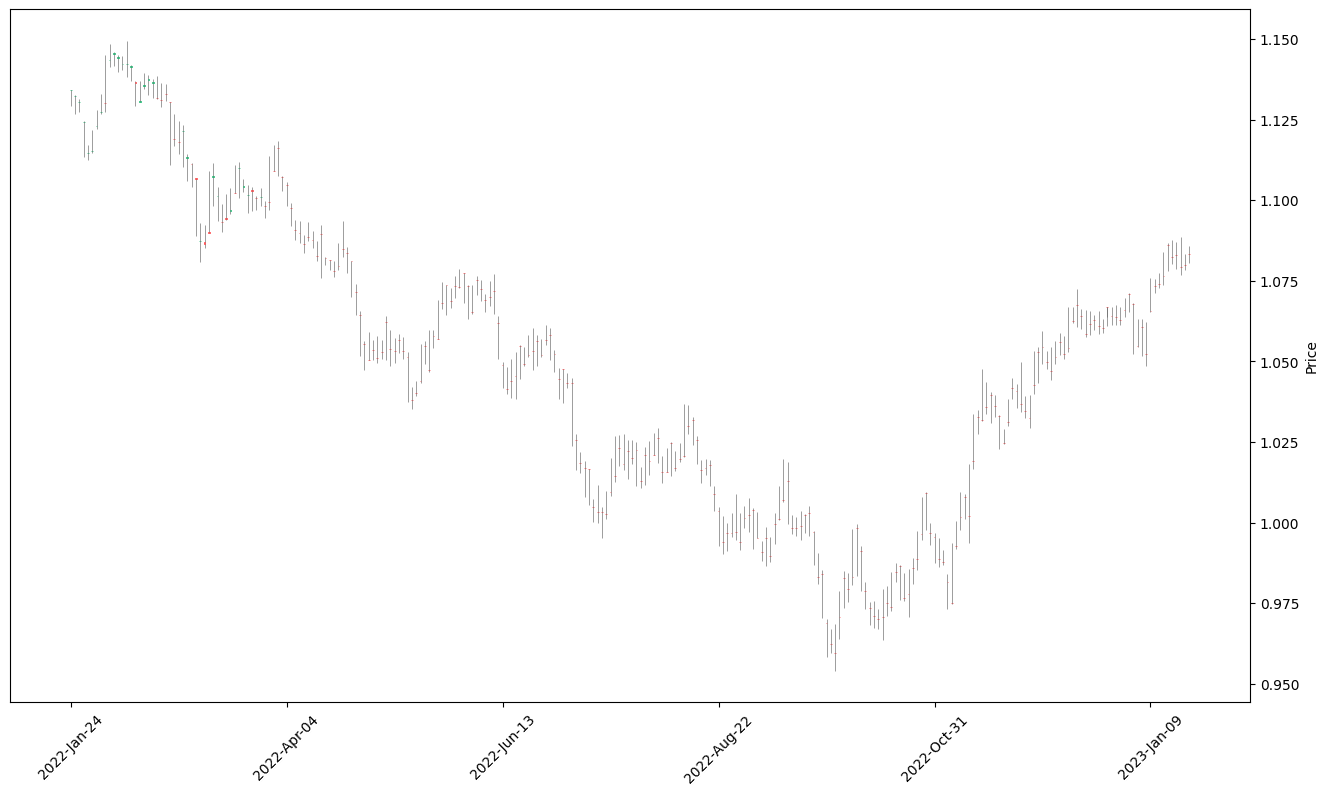

In [4]:
candle = curr.drop(columns = ["Open_X", "Close_X","High_X", "Low_X"])
fig, ax  =plt.subplots(figsize = (16,9))
mpl.plot(candle, type = 'candle', ax=ax, style= "yahoo")

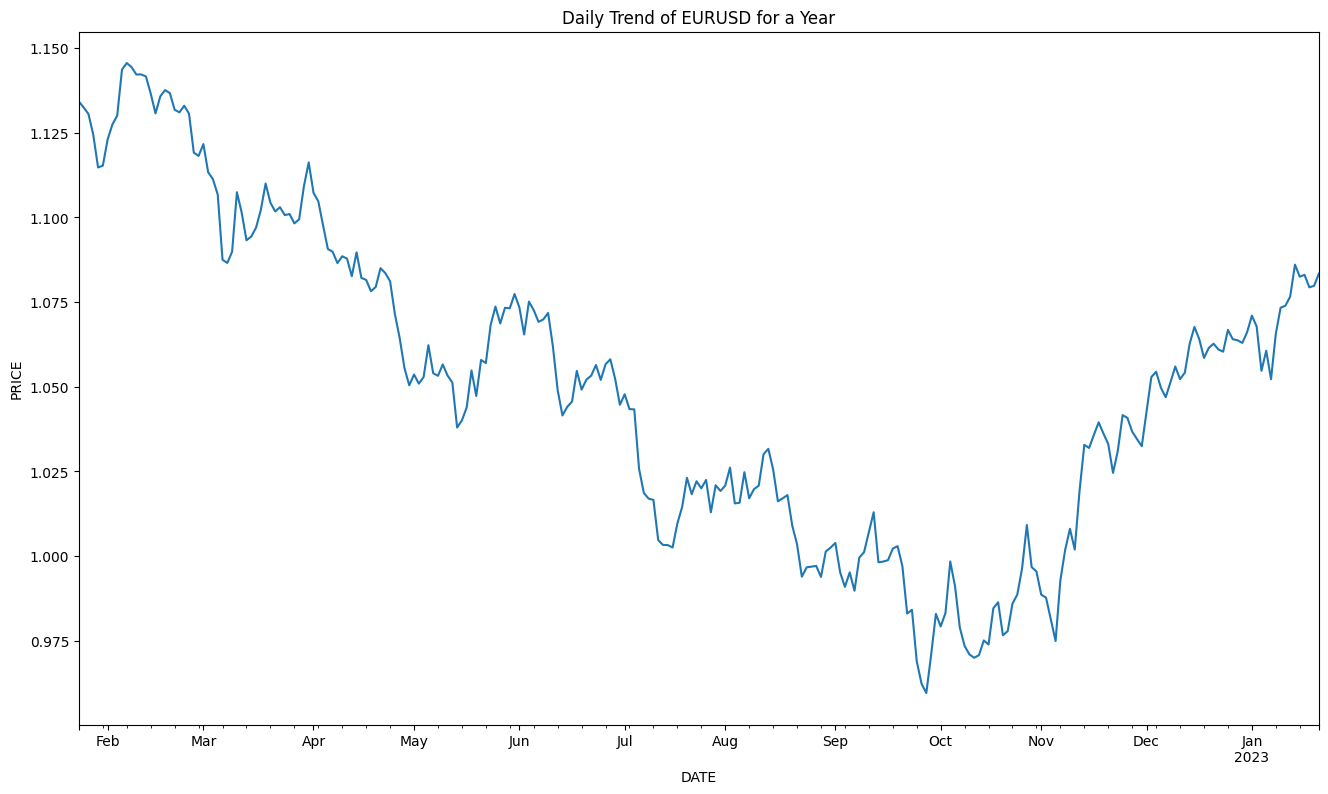

In [5]:
fig, ax = plt.subplots(figsize = (16,9))
curr["Close"].plot(xlabel = "DATE", ylabel = "PRICE",title = "Daily Trend of EURUSD for a Year", ax = ax);

In [6]:
X = curr.drop(columns = ["High", "Low","Close"])
y = curr["Close"]

In [7]:
cuttoff = int(len(X) * 0.8)
X_train, y_train = X.iloc[:cuttoff], y.iloc[:cuttoff]
X_test, y_test = X.iloc[cuttoff:], y.iloc[cuttoff:]

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred_baseline = [y_train.mean()] * len(y_train)
print("Baseline_mae:", mean_absolute_error(y_train, y_pred_baseline))
print("R2_score:", r2_score(y_train, y_pred_baseline))

Baseline_mae: 0.043557087185650885
R2_score: 0.0


In [10]:
y_pred  = model.predict(X_test)
print("mae:", mean_absolute_error(y_test, y_pred))
print("R2_score:", r2_score(y_test, y_pred))

mae: 8.064861554361976e-06
R2_score: 0.999999718958487


In [11]:
def make_prediction(open,prev_day_open, prev_day_price, prev_day_high, prev_day_low):
    data = {
        "Open": open,
        "Open_X": prev_day_open,
        "Close_X": prev_day_price,
        "High_X": prev_day_high,
        "Low_X": prev_day_low
    }
    df = pd.DataFrame(data, index = [0])
    prediction = model.predict(df).round(4)[0]
    return f"Predicted EUR/USD price: ${prediction}"

In [18]:
make_prediction(1.0854,1.0871,1.0871,1.0915,1.0855)

'Predicted EUR/USD price: $1.0854'

In [13]:
test = wrangle("EURUSD=X (1).csv")
test.tail(15)

,Open,High,Low,Close,Open_X,Close_X,High_X,Low_X
Date,,,,,,,,
2023-01-10,1.073318,1.075685,1.071318,1.073318,1.065632,1.065632,1.075951,1.065280
2023-01-11,1.073895,1.077470,1.072685,1.073895,1.073318,1.073318,1.075685,1.071318
2023-01-12,1.076600,1.083835,1.073802,1.076600,1.073895,1.073895,1.077470,1.072685
2023-01-13,1.086024,1.086779,1.078063,1.086024,1.076600,1.076600,1.083835,1.073802
2023-01-16,1.082462,1.087548,1.080264,1.082462,1.086024,1.086024,1.086779,1.078063
2023-01-17,1.083013,1.086909,1.078702,1.083013,1.082462,1.082462,1.087548,1.080264
2023-01-18,1.079331,1.088447,1.076704,1.079331,1.083013,1.083013,1.086909,1.078702
2023-01-19,1.079785,1.083306,1.078295,1.079785,1.079331,1.079331,1.088447,1.076704
2023-01-20,1.083388,1.085658,1.080462,1.083388,1.079785,1.079785,1.083306,1.078295


In [14]:
X_test = curr.drop(columns = ["High", "Low","Close"])
y_test = pd.DataFrame(model.predict(X_test), columns=["Pred_Close"])

In [15]:
y_test.tail(15)

,Pred_Close
245,1.070978
246,1.067776
247,1.054694
248,1.060648
249,1.052232
250,1.065640
251,1.073335
252,1.073903
253,1.076609
254,1.086036


In [16]:
pred_test = pd.DataFrame(
    {
        "Close": 
    }
)

SyntaxError: expression expected after dictionary key and ':' (1892374682.py, line 3)